In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

arrest_data = pd.read_csv("Arrests.csv", usecols = ["INCIDENTNEIGHBORHOOD"])
arrest_data.dropna(inplace=True)
arrest_data.head(10)

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
5,Greenfield
6,Brookline
7,Regent Square
8,East Liberty
10,East Hills


In [3]:
arrestNums = arrest_data.groupby("INCIDENTNEIGHBORHOOD").size()
arrestNums.head()
arrestNums.sort_values(ascending = False)

INCIDENTNEIGHBORHOOD
Central Business District    3570
South Side Flats             3053
Carrick                      2102
East Allegheny               1893
Homewood South               1863
                             ... 
Regent Square                  32
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Length: 98, dtype: int64

In [4]:
population_data = pd.read_csv("Population.csv", usecols = ["2020_Total_Population", "Neighborhood"])
population_data.dropna(inplace=True)
population_data.head(10)
population_data.sort_values(by= "2020_Total_Population", ascending = False)

,Neighborhood,2020_Total_Population
66,Shadyside,15317
75,Squirrel Hill South,15317
12,Brookline,13063
74,Squirrel Hill North,11879
54,North Oakland,10691
...,...,...
55,North Shore,301
85,West End,205
76,St. Clair,183
69,South Shore,29


In [5]:
data_combined = arrest_data.merge(population_data, how = "left", left_on = "INCIDENTNEIGHBORHOOD", right_on = "Neighborhood")
data_combined.dropna(inplace = True)
data_combined.drop("INCIDENTNEIGHBORHOOD", axis = 1, inplace = True)
data_combined.iloc[0:]
data_combined.sort_values(by= "2020_Total_Population", ascending = False)
data_combined2 = data_combined.groupby("Neighborhood").size()
data_combined2.sort_values (ascending = False)
data_combined = data_combined.merge(data_combined2.to_frame(), how = "left", left_on = "Neighborhood", right_on = "Neighborhood")
data_combined.drop_duplicates(inplace = True)
data_combined.head()
data_combined.sort_values(by= [0], ascending = False)
data_combined = data_combined.rename(columns = {data_combined.columns[2]:"Incidents"})
print (data_combined)

         Neighborhood  2020_Total_Population  Incidents
0          Bloomfield                 8665.0        880
1            Westwood                 3332.0        203
2      East Allegheny                 1903.0       1893
3     Crafton Heights                 3999.0        513
4          Greenfield                 7261.0        473
...               ...                    ...        ...
1670    New Homestead                  917.0         38
1795        Ridgemont                  390.0         32
2007   Swisshelm Park                 1339.0         38
2131             Hays                  321.0         98
3144   Chartiers City                  492.0         38

[85 rows x 3 columns]


In [6]:
data_combined["Ratio"] = data_combined["2020_Total_Population"].div(data_combined["Incidents"])
print (data_combined)

         Neighborhood  2020_Total_Population  Incidents      Ratio
0          Bloomfield                 8665.0        880   9.846591
1            Westwood                 3332.0        203  16.413793
2      East Allegheny                 1903.0       1893   1.005283
3     Crafton Heights                 3999.0        513   7.795322
4          Greenfield                 7261.0        473  15.350951
...               ...                    ...        ...        ...
1670    New Homestead                  917.0         38  24.131579
1795        Ridgemont                  390.0         32  12.187500
2007   Swisshelm Park                 1339.0         38  35.236842
2131             Hays                  321.0         98   3.275510
3144   Chartiers City                  492.0         38  12.947368

[85 rows x 4 columns]


In [7]:
data_combined.sort_values(by = "Incidents", ascending = False)

,Neighborhood,2020_Total_Population,Incidents,Ratio
15,South Side Flats,7467.0,3053,2.445791
9,Carrick,10290.0,2102,4.895338
2,East Allegheny,1903.0,1893,1.005283
83,Homewood South,2260.0,1863,1.213097
38,Homewood North,2617.0,1742,1.502296
...,...,...,...,...
2007,Swisshelm Park,1339.0,38,35.236842
3144,Chartiers City,492.0,38,12.947368
6,Regent Square,971.0,32,30.343750
1795,Ridgemont,390.0,32,12.187500


In [8]:
data_combined.sort_values(by= "Ratio", ascending = False)

,Neighborhood,2020_Total_Population,Incidents,Ratio
34,Central Northside,2972.0,23,129.217391
467,Squirrel Hill North,11879.0,252,47.138889
2007,Swisshelm Park,1339.0,38,35.236842
6,Regent Square,971.0,32,30.343750
255,North Oakland,10691.0,390,27.412821
...,...,...,...,...
72,Homewood West,642.0,699,0.918455
205,West End,205.0,250,0.820000
26,North Shore,301.0,722,0.416898
144,South Shore,29.0,268,0.108209


In [40]:
data_combined.sort_values(by= "Ratio", ascending = True)

,Neighborhood,2020_Total_Population,Incidents,Ratio
183,Chateau,19.0,393,0.048346
144,South Shore,29.0,268,0.108209
26,North Shore,301.0,722,0.416898
205,West End,205.0,250,0.820000
72,Homewood West,642.0,699,0.918455
...,...,...,...,...
255,North Oakland,10691.0,390,27.412821
6,Regent Square,971.0,32,30.343750
2007,Swisshelm Park,1339.0,38,35.236842
467,Squirrel Hill North,11879.0,252,47.138889


[Text(0, 0, 'Bloomfield'),
 Text(0, 0, 'Westwood'),
 Text(0, 0, 'East Allegheny'),
 Text(0, 0, 'Crafton Heights'),
 Text(0, 0, 'Greenfield'),
 Text(0, 0, 'Brookline'),
 Text(0, 0, 'Regent Square'),
 Text(0, 0, 'East Liberty'),
 Text(0, 0, 'East Hills'),
 Text(0, 0, 'Carrick')]

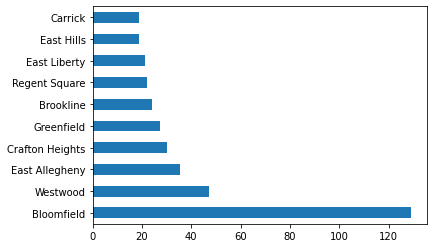

In [17]:
neighborhoods = data_combined.Neighborhood
ratio_data = data_combined.Ratio.sort_values(ascending = False)
ax = ratio_data[:10].plot.barh(width = 0.5)
ax.set_yticklabels(neighborhoods)

In [41]:
data_combined3 = data_combined.loc[:,["Neighborhood", "Ratio"]]
data_combined3.sort_values(inplace = True, by = "Ratio")
data_combined3.head()

,Neighborhood,Ratio
183,Chateau,0.048346
144,South Shore,0.108209
26,North Shore,0.416898
205,West End,0.820000
72,Homewood West,0.918455
